<a href="https://colab.research.google.com/github/Aryanth003/ml_with_fflask/blob/main/iris_Dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [4]:
df=pd.read_csv('/content/iris.csv')
df2=pd.read_csv('/content/iris.csv')
df2.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
df.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])



In [7]:
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


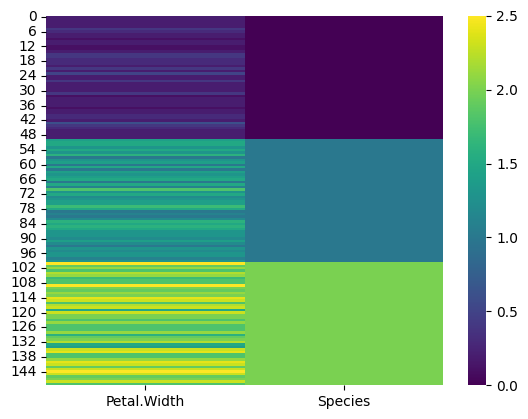

In [8]:
sns.heatmap(df[['Petal.Width','Species']],annot=False,cmap="viridis")
plt.show()

In [9]:
x=df.drop(['Species','Unnamed: 0'],axis=1)
y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [10]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)
# predictions = dtree.predict(x_test)
# from sklearn.metrics import classification_report,confusion_matrix
# print(classification_report(y_test,predictions))
# print('\n')
# print(confusion_matrix(y_test,predictions))


DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.375, 0.875, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'x[2] <= 4.75\nentropy = 1.0\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'x[3] <= 1.65\nentropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.125, 0.125, 'entropy = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.375, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.75, 0.375, 'x[3] <= 1.75\nentropy = 0.519\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.625, 0.125, 'entropy = 1.0\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.875, 0.125, 'entropy = 0.187\nsamples = 35\nvalue = [0, 1, 34]')]

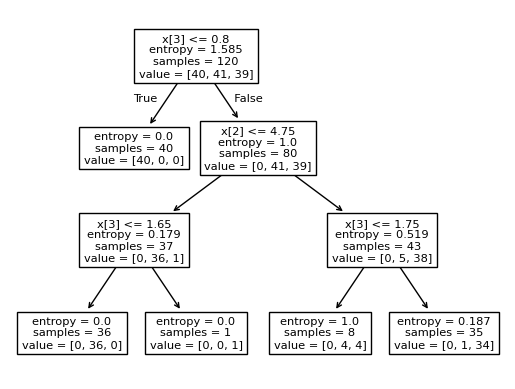

In [11]:
plot_tree(model)

In [13]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

,count
2,11
0,10
1,9


In [15]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Species,,,
0,10,0,0
1,0,9,0
2,0,0,11
